In [2]:
import pandas as pd
import numpy as np
import random
import math
from itertools import permutations
import matplotlib.pyplot as plt

distance = pd.read_csv('C:/Users/assd4/Downloads/SA TS Problems.csv')

In [3]:
distance = distance.iloc[:,1:11]
distance

,1,2,3,4,5,6,7,8,9,10
0,NaN,64.0,78.0,66.0,59.0,53.0,85.0,79.0,67.0,69.0
1,64.0,NaN,55.0,65.0,79.0,73.0,59.0,63.0,90.0,90.0
2,78.0,55.0,NaN,91.0,84.0,77.0,85.0,50.0,96.0,78.0
3,66.0,65.0,91.0,NaN,71.0,70.0,56.0,99.0,66.0,56.0
4,59.0,79.0,84.0,71.0,NaN,73.0,65.0,90.0,76.0,53.0
5,53.0,73.0,77.0,70.0,73.0,NaN,51.0,79.0,70.0,78.0
6,85.0,59.0,85.0,56.0,65.0,51.0,NaN,62.0,51.0,74.0
7,79.0,63.0,50.0,99.0,90.0,79.0,62.0,NaN,70.0,75.0
8,67.0,90.0,96.0,66.0,76.0,70.0,51.0,70.0,NaN,64.0
9,69.0,90.0,78.0,56.0,53.0,78.0,74.0,75.0,64.0,NaN


In [4]:
def objective_value(route):
    total_distance = 0
    for i in range(len(route)-1):
        city1 = route[i]
        city2 = route[i+1]
        total_distance += distance.iloc[city1,city2]
    return total_distance

In [5]:
def initial_route():
    route = random.sample(range(0, 10), 10)
    route.append(route[0])
    return route

In [6]:
def exhaustive():
  ini_pop_list = [0,1,2,3,4,5,6,7,8,9]
  all_route = list(permutations(ini_pop_list))
  all_distance = []

  for i in range(len(all_route)): #add the last city back for all routes
    all_route[i] = all_route[i] + (all_route[i][0],)

  for i in range(len(all_route)): #caculate the all distance for all routes
    all_distance.append(objective_value(all_route[i]))

  shortest_route = all_route[np.argmin(all_distance)]
  shortest_distance = np.min(all_distance)
  print('shortest_route :',shortest_route)
  print('shortest_distance :',shortest_distance)


In [7]:
exhaustive()

shortest_route : (0, 4, 9, 3, 1, 2, 7, 8, 6, 5, 0)
shortest_distance : 563.0


In [7]:
def inversion(route): #Randomly select 2 adjacent cities to swap
    route_copy = route.copy()
    place = random.randint(0,len(route_copy)-2)
    c1 = route_copy[place]
    c2 = route_copy[place+1]
    route_copy[place] = c2
    route_copy[place+1] = c1
    if route_copy[0] != route_copy[-1]: #Make sure the final city is the same as the original
        route_copy[-1] = route_copy[0]
    return route_copy

optimal route : [1, 7, 8, 6, 5, 0, 4, 9, 3, 2, 1]
optimal distance : 602.0


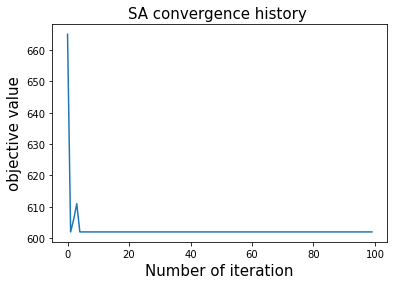

In [69]:
final_t=0.1
t=1000
#niter=20
cool_rate = 0.98
gamma= 0.1
alpha,beta=0.2,0.1

def SA(t,final_t,cool_rate,alpha,beta,gamma):
  route_history ,distance_history= [],[]
  current_route = initial_route()
  current_distance = objective_value(current_route)
  t0 = 1000
  while t > final_t:
    #temp_solution = [] #每個溫度下的10個不同的解
    niter = int(alpha*(t0-t)+beta)
    for time in range(niter):
      new_route = inversion(current_route)
      new_distance = objective_value(new_route)
      if new_distance < current_distance :
        current_route = new_route
        current_distance = new_distance
      else:
        p = np.exp(-(new_distance-current_distance)/t)
        if random.random() < p:
          current_route = new_route
          current_distance = new_distance
      #temp_solution.append(current_distance)
    #std_temp = np.std(temp_solution)

    route_history.append(current_route)
    distance_history.append(current_distance)
    #t = t /( 1+ t * math.log(1+gamma)/3*std_temp ) #Aart and Korst
    t = t/(1+t*gamma) 
    #t = t * cool_rate

  print('optimal route :',route_history[-1])
  print('optimal distance :',distance_history[-1])
  plot(distance_history)

SA(t,final_t,cool_rate,alpha,beta,gamma)

optimal route : [0, 2, 1, 9, 4, 7, 8, 3, 5, 6, 0]
optimal distance : 708.0


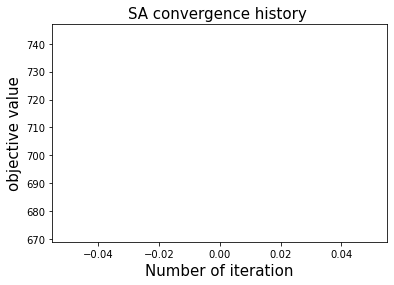

optimal route : [9, 6, 8, 3, 5, 7, 1, 0, 2, 4, 9]
optimal distance : 682.0


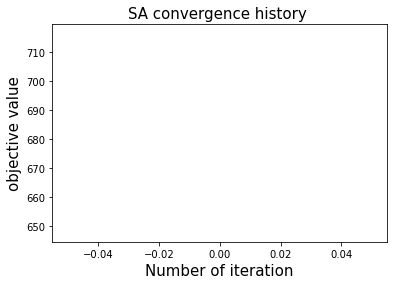

optimal route : [9, 2, 3, 6, 8, 7, 1, 5, 4, 0, 9]
optimal distance : 683.0


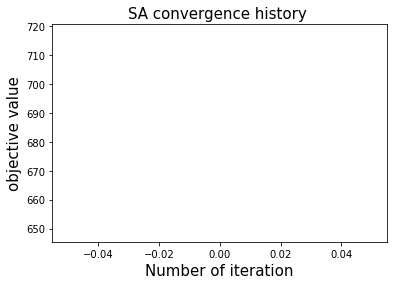

optimal route : [7, 0, 6, 9, 4, 5, 2, 3, 8, 1, 7]
optimal distance : 751.0


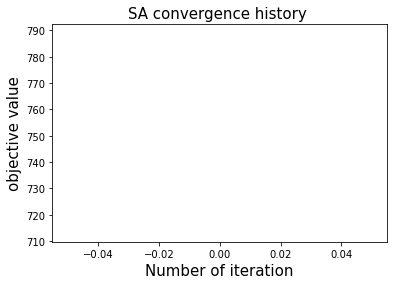

optimal route : [5, 7, 9, 2, 3, 0, 1, 8, 4, 6, 5]
optimal distance : 735.0


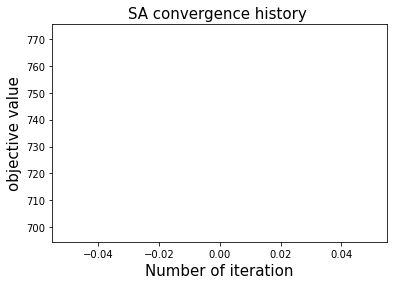

optimal route : [0, 9, 3, 1, 5, 6, 7, 4, 2, 8, 0]
optimal distance : 713.0


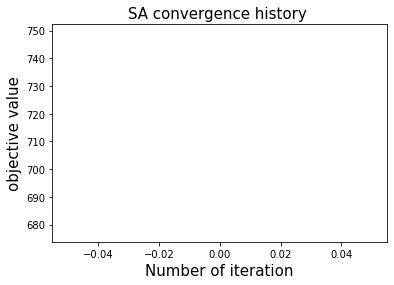

optimal route : [4, 0, 3, 7, 1, 5, 8, 6, 2, 9, 4]
optimal distance : 697.0


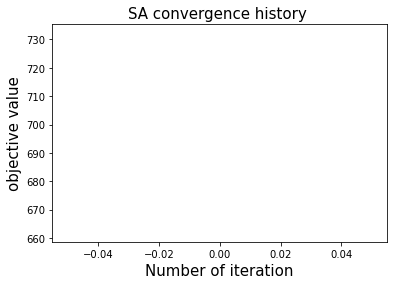

optimal route : [8, 9, 2, 0, 5, 4, 1, 7, 3, 6, 8]
optimal distance : 694.0


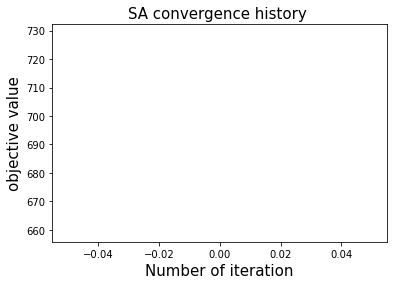

optimal route : [4, 3, 6, 8, 5, 9, 7, 2, 0, 1, 4]
optimal distance : 672.0


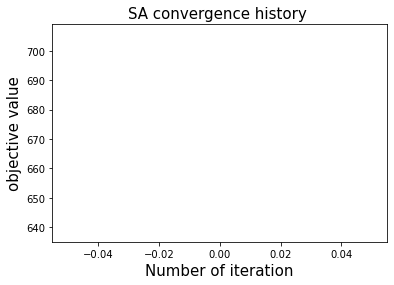

optimal route : [2, 9, 0, 3, 1, 7, 8, 4, 5, 6, 2]
optimal distance : 696.0


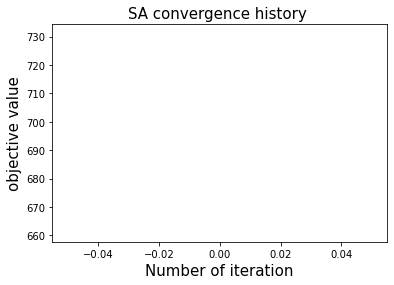

optimal route : [0, 8, 7, 5, 3, 2, 1, 4, 9, 6, 0]
optimal distance : 723.0


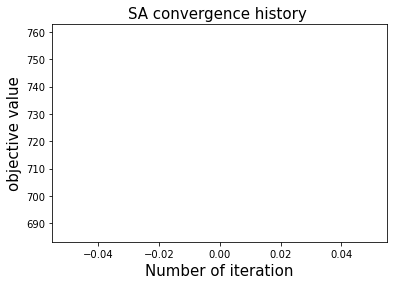

optimal route : [9, 0, 7, 5, 2, 4, 6, 8, 3, 1, 9]
optimal distance : 725.0


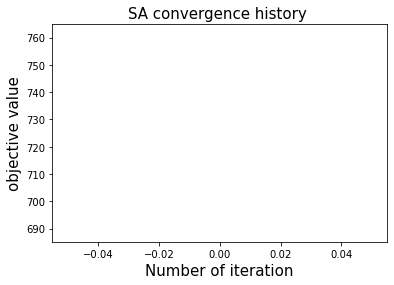

optimal route : [7, 9, 6, 0, 8, 2, 3, 5, 4, 1, 7]
optimal distance : 773.0


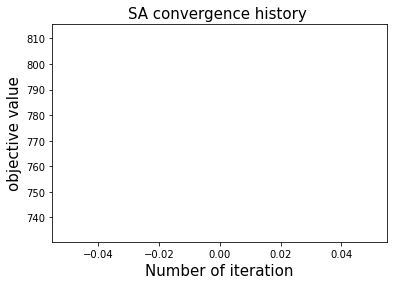

optimal route : [3, 9, 8, 4, 5, 6, 0, 1, 2, 7, 3]
optimal distance : 673.0


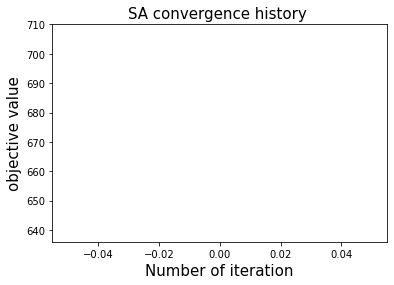

optimal route : [0, 7, 6, 1, 9, 3, 4, 5, 8, 2, 0]
optimal distance : 734.0


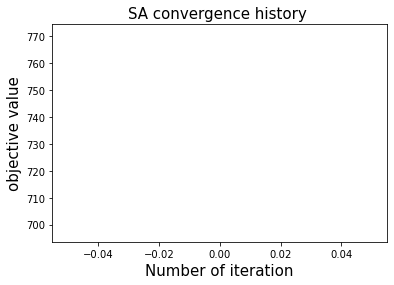

optimal route : [5, 0, 3, 1, 7, 8, 9, 6, 4, 2, 5]
optimal distance : 681.0


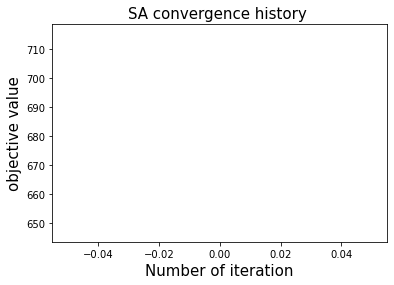

optimal route : [7, 8, 2, 4, 5, 3, 1, 9, 0, 6, 7]
optimal distance : 764.0


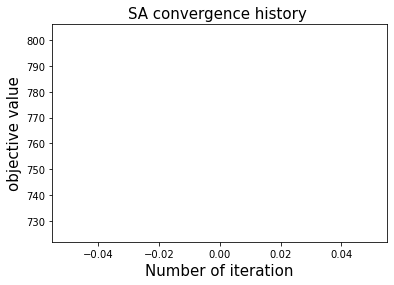

optimal route : [3, 7, 0, 6, 8, 4, 2, 5, 9, 1, 3]
optimal distance : 784.0


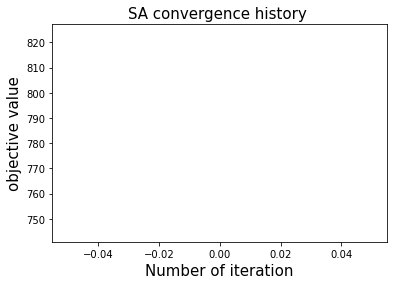

optimal route : [7, 1, 0, 3, 6, 2, 4, 8, 5, 9, 7]
optimal distance : 717.0


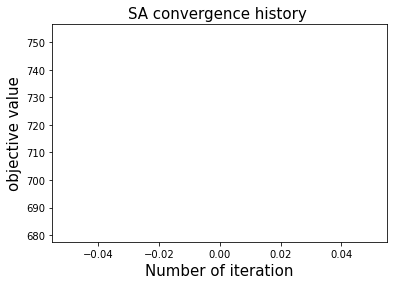

optimal route : [4, 8, 5, 6, 9, 0, 7, 3, 2, 1, 4]
optimal distance : 743.0


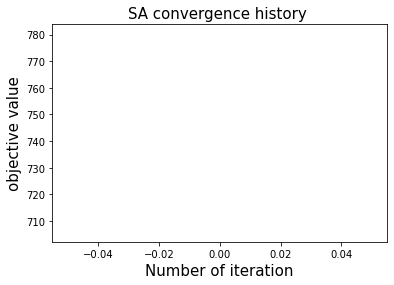

optimal route : [1, 2, 0, 4, 9, 5, 3, 7, 6, 8, 1]
optimal distance : 695.0


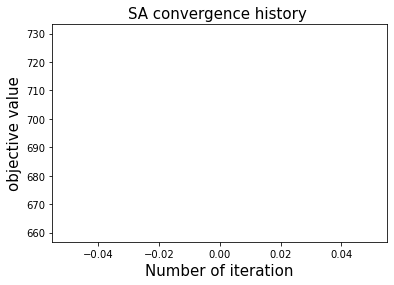

optimal route : [4, 6, 0, 2, 1, 5, 8, 7, 3, 9, 4]
optimal distance : 704.0


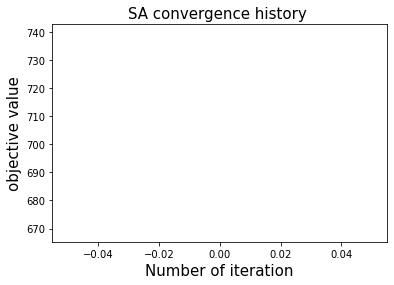

optimal route : [8, 7, 9, 4, 6, 2, 0, 3, 1, 5, 8]
optimal distance : 700.0


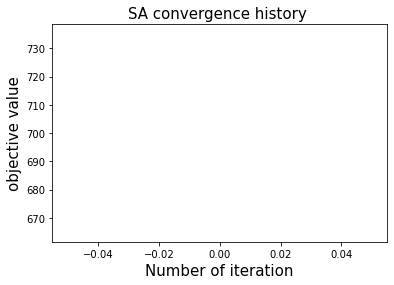

optimal route : [1, 0, 3, 5, 6, 8, 9, 2, 4, 7, 1]
optimal distance : 681.0


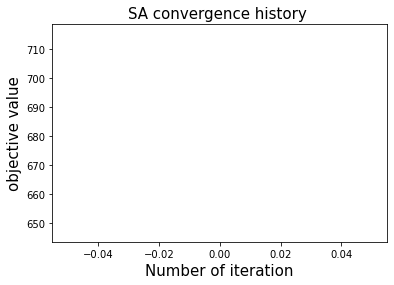

optimal route : [5, 2, 0, 6, 9, 1, 4, 3, 8, 7, 5]
optimal distance : 769.0


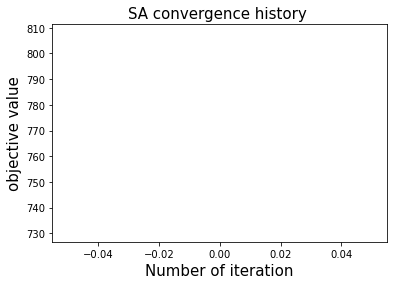

optimal route : [5, 8, 9, 7, 0, 2, 6, 4, 3, 1, 5]
optimal distance : 725.0


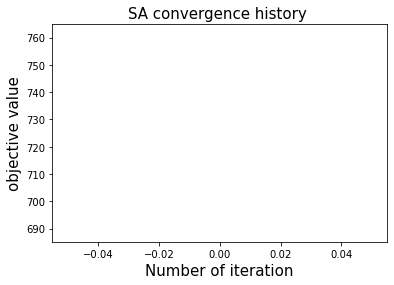

optimal route : [1, 4, 3, 7, 0, 6, 5, 8, 2, 9, 1]
optimal distance : 798.0


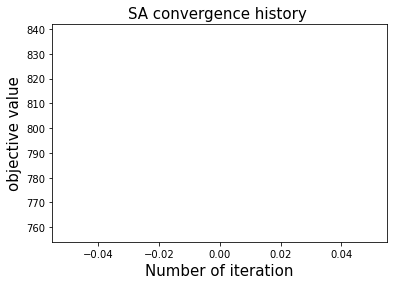

optimal route : [1, 0, 7, 8, 5, 4, 9, 3, 2, 6, 1]
optimal distance : 700.0


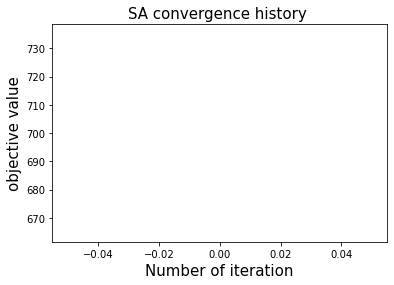

optimal route : [3, 5, 2, 8, 1, 0, 9, 4, 6, 7, 3]
optimal distance : 745.0


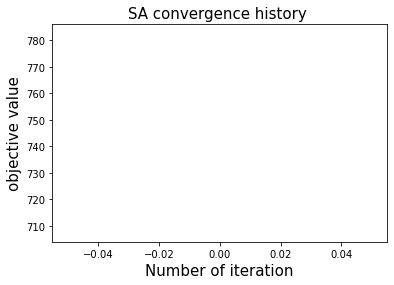

optimal route : [5, 3, 9, 7, 6, 8, 4, 1, 0, 2, 5]
optimal distance : 688.0


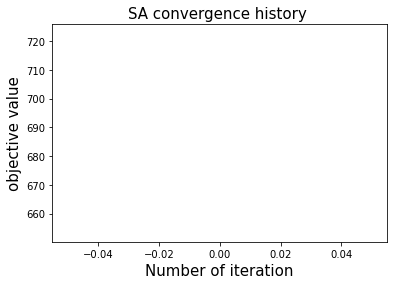

In [47]:
for i in range(30):
    SA(t,final_t,cool_rate,alpha,beta,gamma)

In [11]:

def plot(results):
  X = []
  Y = []
  for i in range(len(results)):
    X.append(i)
    Y.append(results[i])
  plt.plot(X,Y)
  plt.xlabel('Number of iteration',size = 15)
  plt.ylabel('objective value',size = 15)
  plt.title('SA convergence history ',size = 15)
  plt.show()

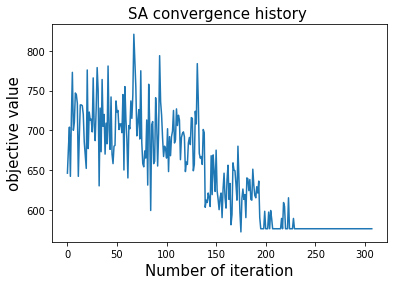

In [98]:
plot(distance_history)

In [ ]:
def SA():